# Data Loading and Transformation from Matrices to Link Counts


make sure to upload data (ie "od-demand-202010-150.npy", od_stop, od_time,etc) from local machine to google colab notebook instance by clicking on "upload files", on the left. They must be re-uploaded every time the notebook instance is closed and re-opened. However, it doesn't take a long time to transform all the data.   

Note: Our bus stop data is for bus line 150S.\
KDST: Kokkedal Station\
EGEV: Egedalsvej\
'HHLS':\
'HHM': Horsholm Midtpunkt\
'GLHO': Gamle Holte\
'NÆST' : Naerum Station\
'KLBV': Klampenborgvej\
'RYST': Ryparken Station\
'HKP': Hans Knudsens Plads\
'NPST1: Norreport Station 1


In [63]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle




def load_data(fp = '', pickle = False):
    data = np.load(fp, allow_pickle = pickle )
    return data

def transform_matrix_fwd(matrix):
    """
    do transformation for the forward route:
    'KDST' 'EGEV' 'HHLS' 'HHM' 'GLHO' 'NÆST' 'KLBV' 'RYST' 'HKP' 'NPST1'
    """
    link_counts = []
    for i in range(len(matrix)-1):
        sum = np.sum(matrix[0:i+1, i+1:])
        link_counts.append(sum)
    return link_counts

def transform_matrix_bwd(matrix):
    """
    do a transformation for the reverse route:
    'NPST1' 'HKP' 'RYST' 'KLBV' 'NÆST' 'GLHO' 'HHM' 'HHLS' 'EGEV' 'KDST' 
    """
    link_counts = []
    for i in range(len(matrix)-1):
        sum = np.sum(matrix[i+1:, 0:i+1])
        link_counts.append(sum)
    link_counts.reverse()
    return link_counts


def transform_all(matrices):
    """Returns: tuple (fwd,bwd) of the route counts of the matrices
    """
    all_counts_fwd = []
    all_counts_bwd = []
    for i in range(len(matrices)):
        all_counts_fwd.append(transform_matrix_fwd(matrices[i]))
        all_counts_bwd.append(transform_matrix_bwd(matrices[i]))
    return (all_counts_fwd, all_counts_bwd)   


demand_matrices = load_data('od-demand-202010-150.npy')

stop_names = load_data('od_stop-202010-150.npy', pickle = True)
print("bus stops: ", stop_names[0:10])


dates = load_data('od_time-202010-150.npy')
dates.shape = [np.shape(dates)[0], 1]
print("dimensions of date data: ", np.shape(dates))

# Finally we transform the data from matrices to link counts
route_counts = transform_all(demand_matrices)
print("dimension of transformed matrices: ", np.shape(route_counts[0]))

test = transform_matrix_fwd(demand_matrices[5700])
print("test: ", test)
print(demand_matrices[5700])









bus stops:  ['KDST' 'EGEV' 'HHLS' 'HHM' 'GLHO' 'NÆST' 'KLBV' 'RYST' 'HKP' 'NPST1']
dimensions of date data:  (5786, 1)
dimension of transformed matrices:  (5786, 9)
test:  [63.0, 50.0, 85.0, 43.0, 26.0, 20.0, 13.0, 12.0, 9.0]
[[ 0.  5.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  3.  0.  0.  0.  1.  0.  0.  0.  2.]
 [ 1.  1.  0.  0.  0.  0.  1.  2.  0.  3.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  2.]
 [ 0.  0.  2.  1.  1.  0.  0.  5.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  1. 22.]
 [ 3.  0.  1.  6.  4.  7. 15.  0.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  8.]
 [ 2.  0.  2.  2.  2. 14. 26.  1. 14.  0.]]


#Basic Plotting and Data Visualization

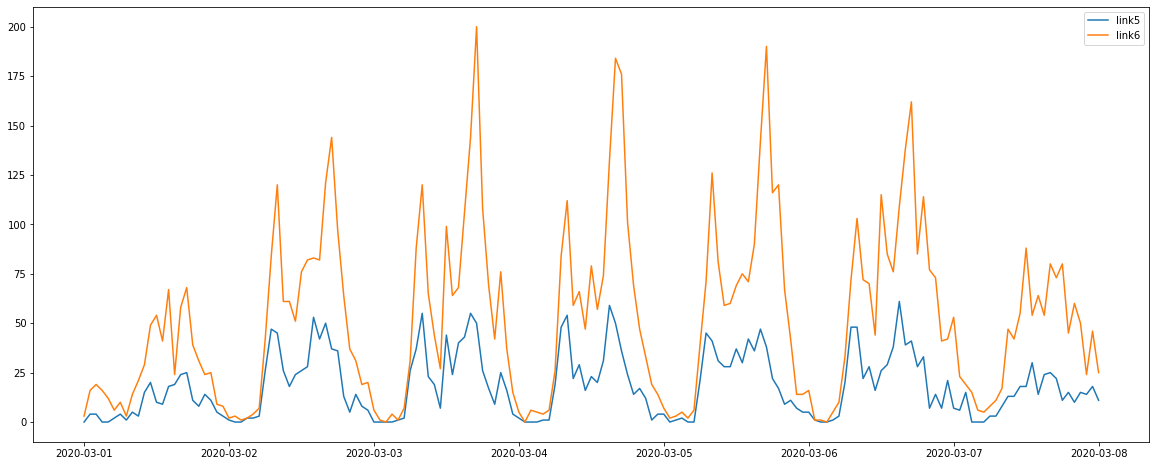

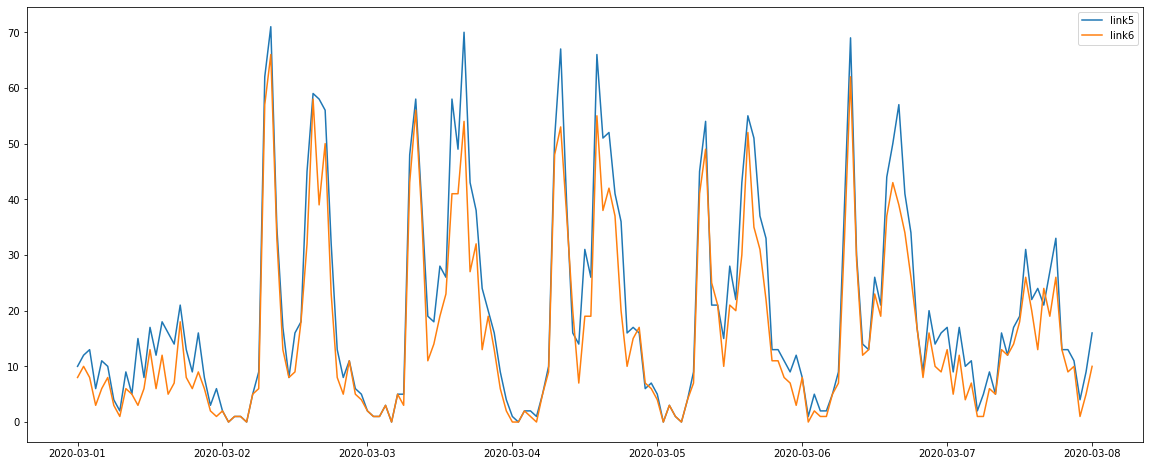

['KLBV' 'RYST']


In [66]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def date_to_string(dates):
    date = ""
    new_dates = []
    for d in dates:
        date = str(d)[2:15]
        new_dates.append(date)
    return new_dates


def transform_to_plot_data(route_counts, start, stop):
    """ Transforms the route counts to a format that can be easily 
        plotted and visualized.
        We create a time series of data (in 1 hour intervals) for each link.
    """
    if not stop <= np.shape(route_counts)[0]:
        print("Error- interval end longer than route count matrix")
        return -1

    link_dict = {}
    for i in range(np.shape(route_counts)[1]):
        links = []
        link_num = i+1

        for j in range(start, stop):
            links.append(route_counts[j][i])

        link_dict[link_num] = links

    return link_dict


def plot_route_counts(route_counts, start, stop, links = range(len(route_counts[1])), plot_type = 'line'):
    """
    Plot the counts at each link over a given time interval.
    When entering in the links you wish to plot, subtract 1. 
    i.e. links = [0,1,2] if you wish to plot links 1, 2, 3.
    It's just an indexing thing. 
    """
    link_dict = transform_to_plot_data(route_counts, start, stop)
    fig = plt.figure(figsize=(20,8))
    
    if plot_type == 'line':
        for i in links:
            plt.plot(dates[start:stop], link_dict[i+1], label='link'+str(i+1))
    elif plot_type == 'bar':

        for i in links:
            plt.bar(list(np.arange(start, stop)), list(link_dict[i+1]))
            plt.xticks(np.arange(start, stop), date_to_string(dates[start:stop]), rotation = 90)

    plt.legend()
    plt.show()
    

links = [4,5]
plot_route_counts(route_counts[0], 168*0, (168*1)+1, links)
plot_route_counts(route_counts[1], 168*0, (168*1)+1, links)
print(stop_names[6:8])
